In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import matplotlib.colors as colors
import lasio
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
wellProd = pd.read_csv("Data/well production.csv")
fileNames = wellProd["well name"]
wellDFs = [pd.read_csv("Data/" + el + ".csv") for el in fileNames]

In [3]:
wellOutput=pd.read_csv("Data/well production.csv")
importantData=wellOutput.iloc[:,0:1]
oilSubset=wellOutput.iloc[:,4:16]
oilSubset2=wellOutput.iloc[:,17:29]
importantData['totalOil'] = oilSubset.sum(axis=1)
importantData['totalWater'] = oilSubset2.sum(axis=1)
importantData

C:\Users\matth\Anaconda3\envs\energyanalytics\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\matth\Anaconda3\envs\energyanalytics\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,well name,totalOil,totalWater
0,Peak 6-217H,6808.0,4378.0
1,Tarragon 4-119H,1968.0,873.0
2,Fennel 10-129H,736.0,298.0
3,Federal 14-113H,2204.0,1093.0
4,King 7-184H,490.0,7.0
...,...,...,...
95,Pole 11-4H,7605.0,6839.0
96,Burger 6-148H,315.0,9.0
97,King 14-184H,8279.0,7227.0
98,Tribal 14-4H,2780.0,1501.0


In [4]:
eastings = [el.easting for el in wellDFs]
northings = [el.northing for el in wellDFs]

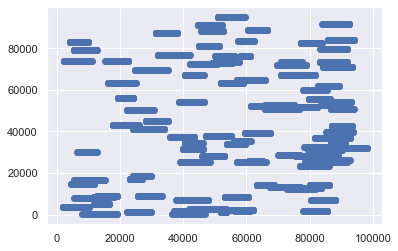

In [5]:
plt.scatter(eastings,northings)

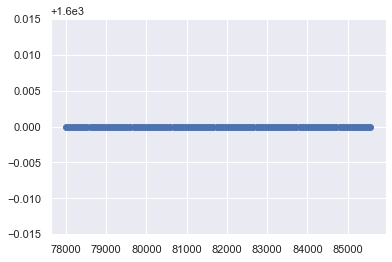

In [6]:
plt.scatter(eastings[0],northings[0])

In [7]:
oils = wellProd["oil 1"]
oilPerPoint = [oils[i] / len(eastings[i]) for i in range(len(oils))]
oilPerPoint;

In [8]:
important = pd.DataFrame(np.array([np.array(eastings).flatten(), np.array(northings).flatten(), np.array(oilPerPoint).repeat(len(eastings))]).transpose())
important

,0,1,2
0,78000.0,1600.0,8.62
1,78076.0,1600.0,8.62
2,78153.0,1600.0,8.62
3,78229.0,1600.0,8.62
4,78306.0,1600.0,8.62
...,...,...,...
9995,68381.0,14400.0,5.42
9996,68434.0,14400.0,5.42
9997,68488.0,14400.0,5.42
9998,68541.0,14400.0,5.42


In [9]:
X = np.array(important.iloc[:,0:2])
y = np.array(important.iloc[:,2])
#reg = LinearRegression().fit(X,y)

In [10]:
from sklearn.svm import SVR

In [11]:
svr = SVR(kernel='poly', degree=4, gamma='scale')

In [12]:
svr.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:
#allX = np.array([np.arange(min(X[:,i]),max(X[:,i]), 1000) for i in range(len(X[0]))])

In [151]:
#cool = np.array(np.meshgrid(allX[0], allX[1])).transpose().reshape(-1, 2);

In [167]:
#yPred = reg.predict(cool)

In [13]:
testX0 = np.linspace(min(X[:,0]), max(X[:,0]), 50)
testX1 = np.linspace(min(X[:,1]), max(X[:,1]), 50)
grid0, grid1 = np.meshgrid(testX0, testX1)
cost = np.array([svr.predict(np.array([grid0[i], grid1[i]]).transpose()) for i in range(len(grid0))])

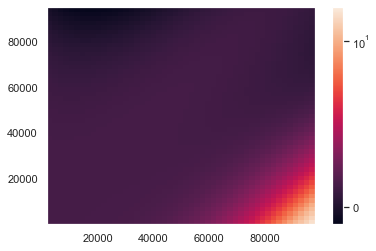

In [14]:
plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                              vmin=cost.min(), vmax=cost.max()))
cbar = plt.colorbar()

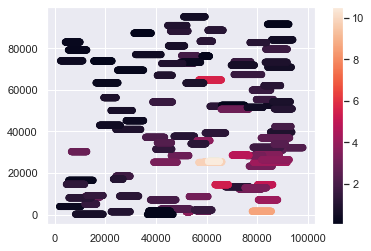

In [31]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [34]:
import ipywidgets as widgets

In [36]:
oilsAll = [wellProd["oil " + str(i+1)] for i in range(12)]

In [37]:
@widgets.interact(w=(0,11,1))
def doItAll(w):
    oils = oilsAll[w]
    oilPerPoint = [oils[i] / len(eastings[i]) for i in range(len(oils))]
    y = np.array(oilPerPoint).repeat(len(eastings))
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.colorbar()

interactive(children=(IntSlider(value=5, description='w', max=11), Output()), _dom_classes=('widget-interact',…

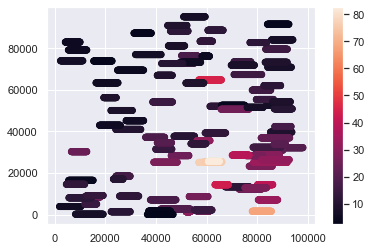

In [56]:
oilsT = [np.array(oilsAll)[:,i].sum() for i in range(len(oilsAll[0]))]
oilPerPoint = [oilsT[i] / len(eastings[i]) for i in range(len(oilsT))]
y = np.array(oilPerPoint).repeat(len(eastings))
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

In [32]:
[(eastings[i][1], northings[i][1]) for i in range(len(eastings))];